# Investigating the Equation

Collate the data

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

collated_data["RMs"].info()

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
<Table length=188842>
         name          dtype  shape   unit    class   n_bad
--------------------- ------- ----- -------- -------- -----
           ra_dec_obj  object        deg,deg SkyCoord     0
 H-alpha flux [Error] float32              R   Column     0
         H-alpha flux float32              R   Column     0
           ra_dec_deg float64  (2,)            Column     0
                   RM float64       rad / m2   Column     1
            RM_uncert float64       rad / m2   Column     1
              pol_int float64                  Column     1
       pol_int_uncert float64                  Column     0
   ra_dec_pix_offsets float64  (2,)            Column     0
    interpolation_raw float64       rad / m2   Column     0
    interpolation_cor float64       rad / m2   Column     0
    interpola

In [2]:
#from matplotlib import pyplot as plt

#ct.add_interpolations(collated_data["RMs"], interpolation_post_err=collated_data["interpolation"]['corrected_err'], save_file="../data_processed/proc_rms.ecsv")

In [3]:
from synthesis import hvc_looper as hvcl

#hvcl.save_HVC_RMs(collated_data)
#hvcl.add_magnetic_field_RMs(collated_data)

=== HVC RM SAVER ===
Taking HVC snapshots
Process complete


## Determining how to calculate weighted means

First, select one HVC and snapshot

In [ ]:
collated_data.keys()

dict_keys(['RMs', 'HVCs', 'HI', 'H-alpha', 'interpolation'])

In [ ]:
index = 6
hvc = snap.take_snapshot(index, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"])

=== HVC SNAPSHOT ===
Gathering data ...
Cropping H-alpha
Cropping HI
Cropping interpolation
Filtering RMs
583 RM grid points found
Snipping complete


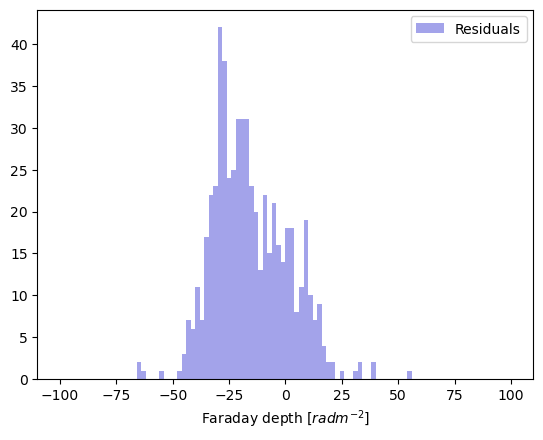

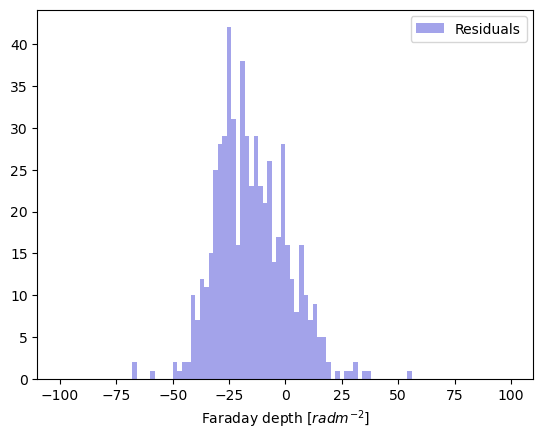

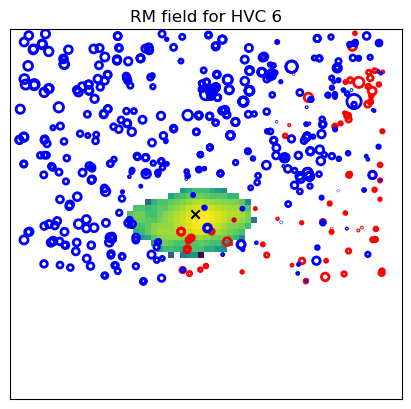

In [ ]:
import numpy as np
from plotting import honours_plot as hplt

hplt.plot_RM_histogram_single(hvc["RMs"]["RM"], hvc["RMs"]["interpolation_raw"])
hplt.plot_RM_histogram_single(hvc["RMs"]["RM"], hvc["RMs"]["interpolation_cor"])

rm_overlay = np.array([
    hvc["RMs"]["pixel location x"],
    hvc["RMs"]["pixel location y"],
    hvc["RMs"]["RM"]-hvc["RMs"]["interpolation_cor"]
    ])
hplt.plot_fits_RM_overlay(rm_overlay, hvc["HI"], show=True, index=index, pixel_corners=hvc["HI_pixel_corners"])